WeatherPy
# Generate Random Geographic Coordinates and a List of Cities


In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


### Generate the Cities List by Using the `citipy` Library

#Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code

In [16]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Define Units
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units=" + units

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taoudenni
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | hirara
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | alice springs
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | san fernando de apure
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | cidreira
Processing Record 13 of Set 1 | trenton
Processing Record 14 of Set 1 | cherdyn'
Processing Record 15 of Set 1 | rongelap
Processing Record 16 of Set 1 | uturoa
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | slonim
Processing Record 19 of Set 1 | barth
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | sittwe
Processing Record 22 of Set 1 | itamar

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taoudenni,22.6783,-3.9836,41.96,6,14,3.41,ML,1720468391
1,waitangi,-43.9535,-176.5597,8.23,82,100,1.34,NZ,1720468393
2,yellowknife,62.4560,-114.3525,23.56,51,20,3.09,CA,1720468395
3,hirara,24.8000,125.2833,26.92,94,4,3.09,JP,1720468398
4,port-aux-francais,-49.3500,70.2167,2.29,85,9,14.57,TF,1720468401


In [73]:
# Export the City_Data into a csv
import os

output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [74]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taoudenni,22.6783,-3.9836,41.96,6,14,3.41,ML,1720468391
1,waitangi,-43.9535,-176.5597,8.23,82,100,1.34,NZ,1720468393
2,yellowknife,62.4560,-114.3525,23.56,51,20,3.09,CA,1720468395
3,hirara,24.8000,125.2833,26.92,94,4,3.09,JP,1720468398
4,port-aux-francais,-49.3500,70.2167,2.29,85,9,14.57,TF,1720468401


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

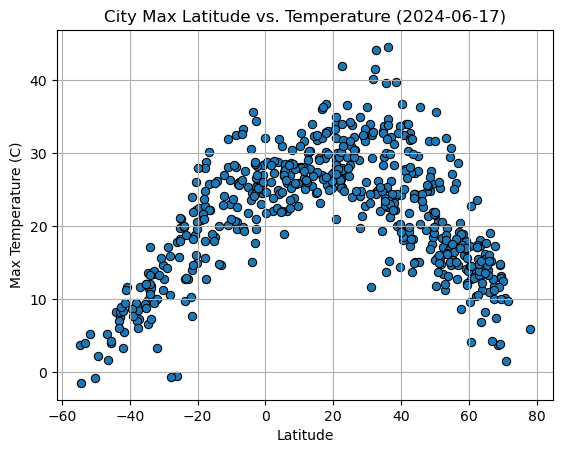

In [75]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            marker="o", 
            edgecolors="black", 
            linewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

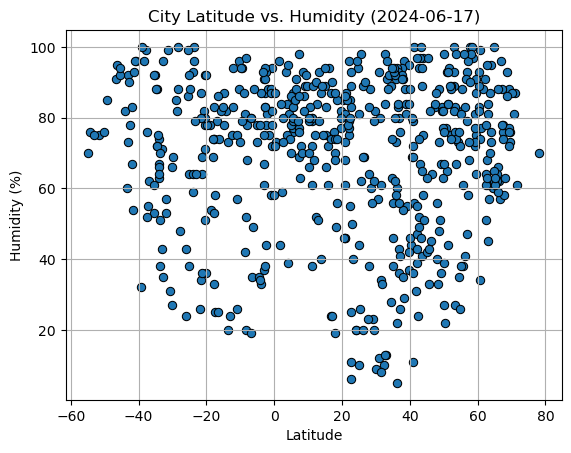

In [77]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            marker="o", 
            edgecolors="black", 
            linewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

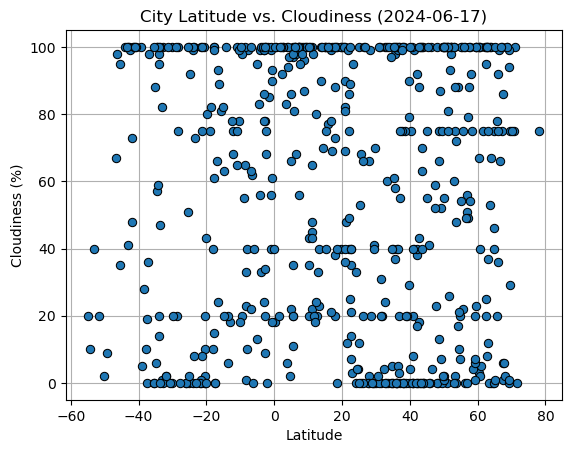

In [79]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

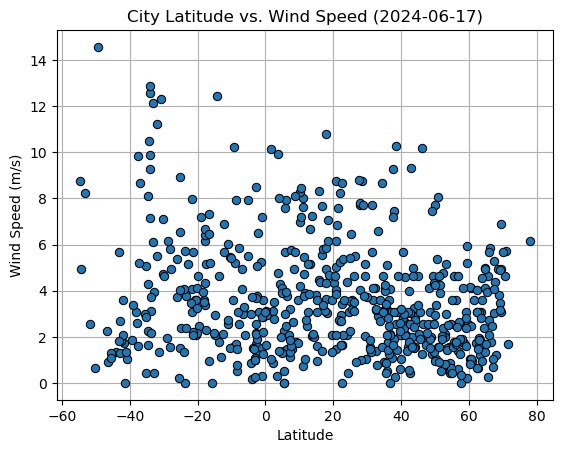

In [81]:
# Build the scatter plots for latitude vs. wind speed

plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taoudenni,22.6783,-3.9836,41.96,6,14,3.41,ML,1720468391
2,yellowknife,62.4560,-114.3525,23.56,51,20,3.09,CA,1720468395
3,hirara,24.8000,125.2833,26.92,94,4,3.09,JP,1720468398
9,san fernando de apure,7.8878,-67.4724,30.43,72,100,1.49,VE,1720468414
10,iqaluit,63.7506,-68.5145,6.85,87,100,3.09,CA,1720468417


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,8.23,82,100,1.34,NZ,1720468393
4,port-aux-francais,-49.3500,70.2167,2.29,85,9,14.57,TF,1720468401
5,edinburgh of the seven seas,-37.0676,-12.3116,11.67,62,98,8.67,SH,1720468403
6,margaret river,-33.9500,115.0667,17.22,74,14,9.89,AU,1720468408
7,alice springs,-23.7000,133.8833,9.75,100,100,0.00,AU,1720468410


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.422426276381186


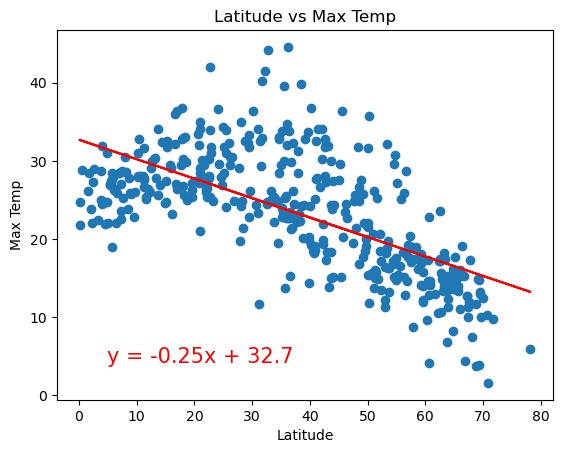

In [86]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Latitude vs Max Temp")

linear_regression(x_values, y_values, 0.1, 0.1)

The r^2-value is: 0.7389222615472305


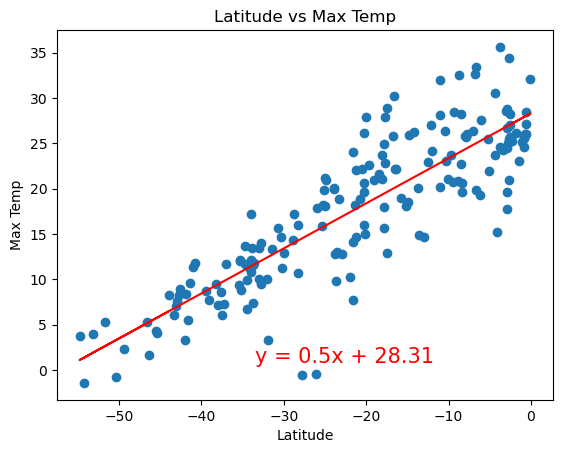

In [87]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Latitude vs Max Temp")
linear_regression(x_values, y_values, 0.4, 0.1)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere:
Performing a linear regression analysis on the relationship between maximum temperature and latitude in the Northern Hemisphere. The r-value of 0.422 indicates a moderate positive correlation between these two variables. it indicates that approximately 42.24% of the variation.
Max temperature drops as the latitude increases.

Southern Hemisphere:

The ( R^2 ) value of 0.7389 indicates that about 73.89% of the variance. This value suggests a strong correlation between the two Max temperature and Latitude





### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 3.284260298844667e-05


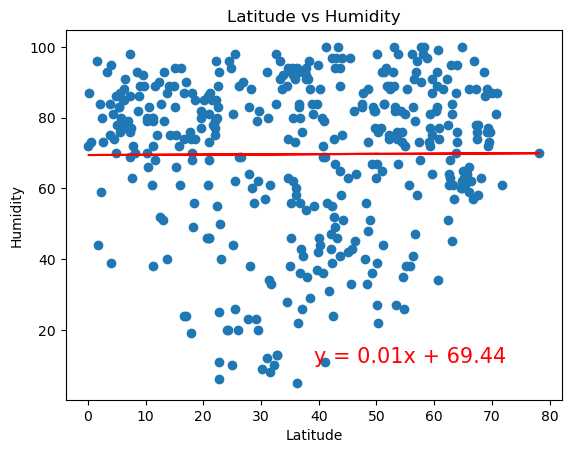

In [71]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title("Latitude vs Humidity")
linear_regression(x_values, y_values, 0.5, 0.1)

The r^2-value is: 0.00628893090700073


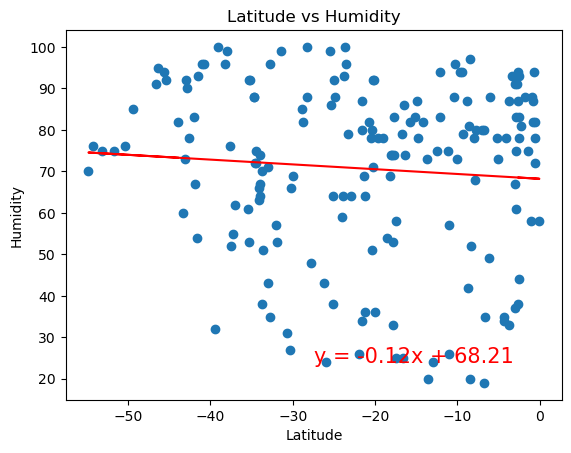

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title("Latitude vs Humidity")
linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

NORTHERN HEMISPERE
The R-squared value 3.284260298844667e-05, is very close to zero. A value close to zero indicates that there may not be a linear relationship between Latitude and Humidity. 

SOUTHERN HEMISPHERE
The R-squared value 0.00628893090700073, is still very close to zero. This value indicates that only about 0.63% of the variance.

A low R-squared value like this suggests that the independent variable has very little explanatory power in predicting the dependent variable. Again it indicates almost no relationship between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.013775281652776647


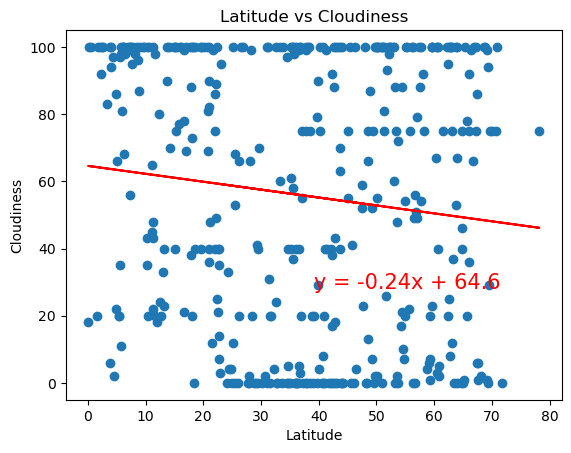

In [72]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title("Latitude vs Cloudiness")
linear_regression(x_values, y_values, 0.5, 0.3)

The r^2-value is: 0.008792074185791933


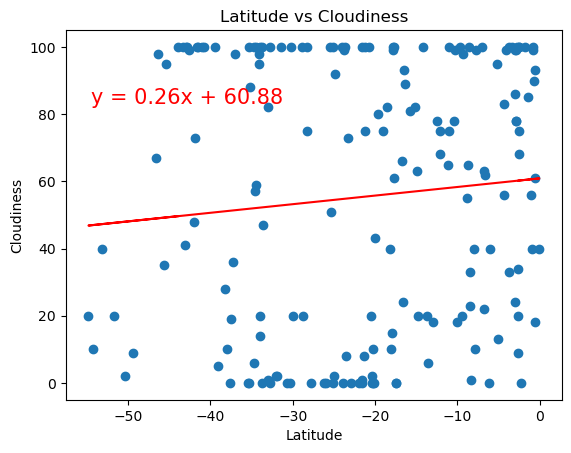

In [88]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title("Latitude vs Cloudiness")
linear_regression(x_values, y_values, 0.05, 0.8)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern hemisphere
The R-squared value 0.013775281652776647, is quite low. This value indicates that approximately 1.38% of the variance and indicates no relation between Latitude and cloudiness
A low R-squared value suggests cloudiness has limited explanatory power in predicting the latitude.

Southern Hemisphere
The R-squared value 0.008792074185791933, is relatively low. This value indicates that around 0.88% of the variance in cloudiness can be explained by the Latitude.


### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.03990727943723699


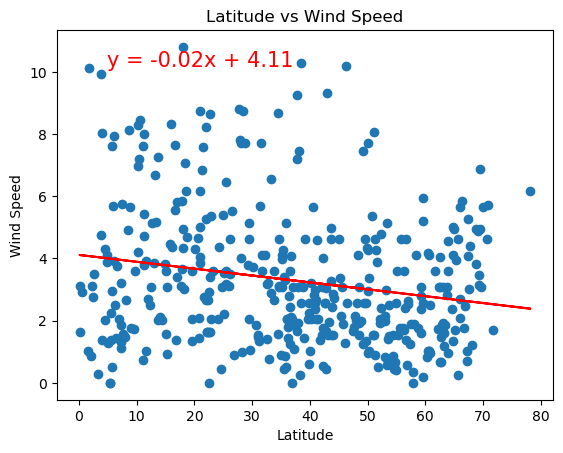

In [89]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Latitude vs Wind Speed")
linear_regression(x_values, y_values)


The r^2-value is: 0.02493015759807707


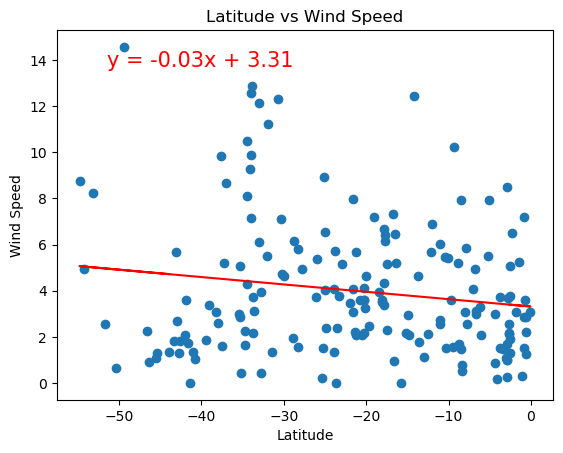

In [90]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Latitude vs Wind Speed")
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern hemisphere
The ( r^2 ) value you is 0.0399, which means that about 3.99% of the variability and this value indicates a weak relationship between the Latitude and Wind speed.

Southern hemisphere
The ( r^2 ) value  is 0.0249, which means that about 2.49% of the variability and again this value also indicates a weak relationship between the two variables.